# Empircal Orthogonal Function Analysis (EOFs)
Also called Principal Component Analysis (PCA)

#### Framing of the problem:

In climate, we often have lots of data that varies (and co-varies) in space and time.  For example, we have our monthly precipitation data as time series of maps with dimensions `[time, lat, lon]`. 

We want to understand the variability of the precipitation and answer questions like: 

* Why does it rain more or less at times in this location or that location? 

* What large-scale patterns are there that are associated with more or less rainfall in certain regions?  

* Is there any regularity in time about when it rains more or less?

It is impossible to look at thousands or tens of thousands of maps or even movies of our data to identify patterns and understand this.

__Climate data is complicated because it varies in space and time__

### We use EOFs to simplify our data

We simplify our data by trying to identify the patterns in the data that are associated with the largest amount of variability and we want each of the patterns to be unrelated to each other. 

__What do I mean by this?__

We want to identify some simpler set of spatial patterns (i.e. maps) that explain the most variability and a corresponding timeseries that tells us how that spatial pattern varies.  We want each spatial pattern to tell us something different than the other spatial patterns.

### Overview Summary 

EOFs will:

* Find the spatial patterns of variabilty
* Find their time variation
* Give a measure of importance of each pattern

You can think of EOFs as:

* a method for simplifying our data (data reduction method)
* a way of identifying spatial and temporal patterns of importance (in terms of variance) in climate data 

### What is it?

_Note: This is a high-level explanation designed to not require extensive math.  The detailed mathematical explanation is left for statistics class or this [document](http://brunnur.vedur.is/pub/halldor/PICKUP/eof.pdf)._

It is a way of reducing the complexity of our data by finding a new coordinate system (instead of x,y,z,...) which aligns with the direction of the most variance in the data.  The coordinates where the data has little variance can then be eliminated, reducing the dimensionality and complexity of our data.

__Examples__

A graphical explanation is provided [here](https://setosa.io/ev/principal-component-analysis/)

In these examples, we could see graphically what is happening for 2D,3D, and sort of for 17D.  

In climate we have many more dimensions to our data. For 1x1deg data, we would say we probably have at least 64,800 x,y dimensions + time.  

### How do we calculate them (and some terminology)?

EOFs are calculated by identifying the most important patterns of variability, and how important they are. The patterns are called `eigenvectors` and their degree of importance is measured in `eigenvalues`. 

* The `eigenvectors` and `eigenvalues` are calculated from the `covariance matrix`.   

* The `covariance matrix` is a way of containing all the information about how the data varies with itself in space and time.

* The `eigenvectors` identify the new coordinates in our data where the variance is largest based on our `covariance matrix`. 

* The `eigenvalues` measure the importance of the `eigenvector`, so they tell us a ranking of how important is each spatial pattern identified by the `eigenvectors`.  

Given anomalies `X` and dimensions `[time,space]`, the data can be re-defined based on the new coordinate system in terms of its  spatial part `EOF spatial patterns` and its temporal part `PC timeseries` based on its `eigenvectors`:

$ X[time,space] = PC[time,enum] x EOF^T[enum,space] $

where 

* `enum` tells us which `eigenvector`
* `space` is all our points in space (`nlons*nlats`)
* `time` is all our times `nt`

We get the `PC time series` from the `eigenvectors` and we get the corresponding `EOF spatial patterns` by solving for them in the above equation. 

$ EOF[space,enum] = X^T[space,time] x PC[time,enum] $

### Example of how EOFs are used... NAO

The **[North Atlantic Oscillation NAO](https://climatedataguide.ucar.edu/climate-data/hurrell-north-atlantic-oscillation-nao-index-pc-based)** index is simply the magnitude of the *eigenvalue* of the first EOF of sea-level pressure anomalies over the Atlantic sector, 20°-80°N, 90°W-40°E. 

![NAO in DJF](https://climatedataguide.ucar.edu/sites/default/files/styles/node_key_figures_display/public/key_figures/climate_data_set/nao_pc_djf_8.gif?itok=VlWyV5wG)

### Example of how EOFs are used... MJO

The phase of the **Madden-Julian Oscillation (MJO)** is typically portrayed by use of EOFs.  

#### What is the MJO?

From [climate.gov](https://www.climate.gov/news-features/blogs/enso/what-mjo-and-why-do-we-care):

> Imagine ENSO as a person riding a stationary exercise bike in the middle of a stage all day long. His unchanging location is associated with the persistent changes in tropical rainfall and winds that we have previously described as being linked to ENSO. Now imagine another bike rider entering the stage on the left and pedaling slowly across the stage, passing the stationary bike (ENSO), and exiting the stage at the right. This bike rider we will call the MJO and he/she may cross the stage from left to right several times during the show.

You are all familiar with sines and cosines:

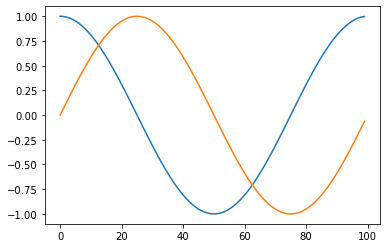

In [8]:
import numpy as np
import matplotlib.pyplot as plt
sin_wave = np.array([np.sin(x/100*2*np.pi) for x in range(100)])
cos_wave = np.array([np.cos(x/100*2*np.pi) for x in range(100)])
plt.plot(cos_wave)
plt.plot(sin_wave)

You may also be familiar with something called [Fourier Series](https://en.wikipedia.org/wiki/Fourier_series), which is a way to decompose any time series of data into a superposition of sines and cosines. In the simplest case, we can look at a single wave, and note that we can draw the wave with any *phase* (i.e., it's peak at a certain location on the X-axis) by a simple but clever combination of a single cosine and a single sine:
$$\cos(x-\phi) = \cos(\phi) \cdot \cos(x) + \sin(\phi) \cdot \sin(x)$$

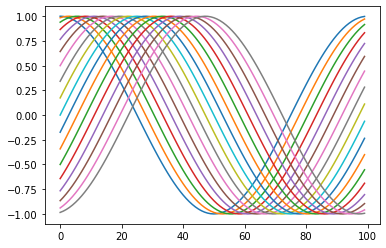

In [11]:
for i in range(18):
    phase = (i*10)/180*np.pi
    a = np.cos(phase) ; b = np.sin(phase)
    plt.plot(a*cos_wave+b*sin_wave)

So, you can think of a single wave travelling around the equator as being represented by a combination of two *stationary* waves (analogous to *eigenvectors*, showing the shape or pattern that contribute to the variability of the MJO) and the changing *phase* as the MJO propagates from west to east are the *eigenvalues*: $a = \cos(\phi)$ and $b = \sin(\phi)$ in the cell above.

![Image of MJO phases](https://www.climate.gov/sites/default/files/styles/full_width_620_original_image/public/2021-10/MJO-fig1.png?itok=0Gxx4Kh5)

The MJO is not equally strong all the way around the globe, but peaks in strength around Indonesia and is weak over the Atlantic. Thus, you can think of one of the stationary trig functions being more dominant, and the other one secondary. As a result, the MJO is commonly quantified by the *eigenvalues* of its first two EOFs. One of the most widely used is the [Real-time Multivariate MJO Index (RMM)](https://iridl.ldeo.columbia.edu/SOURCES/.BoM/.MJO/.RMM/index.html?Set-Language=en) a.k.a. "Wheeler and Hendon Index".  Shown below is a variant called the "Real-time OLR MJO Index" that uses only outgoing longwave radiation measured by satellite:


![Current ROMI](https://psl.noaa.gov/mjo/mjoindex/romi_phase_diag.png)

The MJO depicted in terms of the magnitudes of EOF1 and EOF2 typically trace a rough circle when their eigenvalues are plotted along the two axes. The time it takes to propagate around the center is the period of the MJO. In this way, stationary patterns represented by eigenvectors can depict a moving pattern by the way the eigenvalues change in time.